In [1]:
import numpy as np
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
eps = np.finfo(float).eps
import math
from numpy import log2 as log

df =pd.read_csv('/home/neelesh/Downloads/train.csv')
df = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary','sales','left']]
df.salary.replace(('low', 'medium','high'), (0,1,2), inplace=True)
df.sales.replace(('sales', 'accounting','technical','management','IT','product_mng','hr','marketing','RandD','support'), (0,1,2,3,4,5,6,7,8,9), inplace=True)

In [2]:
def find_entropy(df):
    entropy_node = 0 
    values = df.left.unique() 
    for value in values:
        fraction = float(df.left.value_counts()[value])/len(df.left) 
        entropy_node += -fraction*np.log2(fraction+eps) 
    return entropy_node

In [3]:
def find_entropy_attribute(df,attribute):
    target_variables = df.left.unique() 
    df=df.sort_values(attribute)
    arr=np.array(df[attribute])
    minentropy=None
    ans=None
    mydict=[]
    for i in range(0,len(arr)-1):
            val=(arr[i]+arr[i+1])/2.0
            if(val in mydict):
                continue
            else:
                mydict.append(val)
 
            temp=df[[attribute,'left']]
            larr=df.loc[df[attribute]<=val]
            rarr=df.loc[df[attribute]>val]
            left_zero=len(larr[(larr['left']==0)])
            left_one=len(larr[(larr['left']==1)])
            right_zero=len(rarr[(rarr['left']==0)])
            right_one=len(rarr[(rarr['left']==1)])

            fraction1=float(left_zero)/(left_zero+left_one+eps)
            E=(fraction1*np.log2(fraction1+eps))            
            E+=(1-fraction1)*np.log2(1-fraction1+eps)
            E*=-1        
            fraction2=float(left_zero+left_one)/len(df)
            I=fraction2*E
    

            fraction1=float(right_zero)/(right_zero+right_one+eps)
            E=(fraction1*np.log2(fraction1+eps))      
            E+=((1-fraction1)*np.log2(1-fraction1+eps))
            E*=-1           
            fraction2=float(right_zero+right_one)/len(df)
            I+=fraction2*E

            if(minentropy is None or I<minentropy):
                minentropy=I
                ans=val  
    return ans,minentropy

In [4]:
def find_best_attribute(df,prev=None):
    maxgain=None
    ans=None
    E=find_entropy(df)
    for key in df.keys()[:-1]:
         if(prev is None or key!=prev):
                breakpoint,I=find_entropy_attribute(df,key)
                Gain=(E-I)
                if(maxgain is None or Gain>maxgain):
                                 maxgain=Gain
                                 ans=key
                                 maxbreak=breakpoint
    return ans

In [5]:
node1=find_best_attribute(df)
node2=find_best_attribute(df,node1)

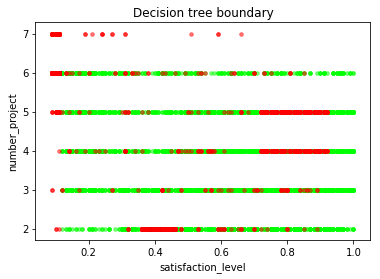

In [6]:
X_data=df.loc[df['left']==0]
x=np.array(X_data[node1])
y=np.array(X_data[node2])

X_data=df.loc[df['left']==1]
x1=np.array(X_data[node1])
y1=np.array(X_data[node2])

colors = (0,1,0)
colors1 = (1,0,0)
area = np.pi*4
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x1, y1, s=area, c=colors1, alpha=0.5)
plt.title('Decision tree boundary')
plt.xlabel(node1)
plt.ylabel(node2)
plt.show()